
#**Maintenance Data Analysis**

This notebook provides a **comprehensive Exploratory Data Analysis (EDA)** and **descriptive statistics** of the maintenance dataset.  
It explores machine conditions, downtime costs, technician availability, and failure probabilities to uncover insights that can optimize plant maintenance logistics.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "maintenance.csv"  # ensure this file is in the same directory
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Machine_ID                   1430 non-null   object 
 1   Temp_C                       1430 non-null   float64
 2   Vibration_mm_s               1430 non-null   float64
 3   Pressure_Bar                 1430 non-null   float64
 4   Acoustic_dB                  1430 non-null   float64
 5   Inspection_Duration_min      1430 non-null   int64  
 6   Downtime_Cost_USD            1430 non-null   int64  
 7   Technician_Availability_pct  1430 non-null   int64  
 8   Failure_Prob                 1430 non-null   float64
 9   Maintenance_Priority         1430 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 111.8+ KB


,Machine_ID,Temp_C,Vibration_mm_s,Pressure_Bar,Acoustic_dB,Inspection_Duration_min,Downtime_Cost_USD,Technician_Availability_pct,Failure_Prob,Maintenance_Priority
0,M004,70.415631,3.036378,5.582562,74.494678,68,3112,99,0.48,2
1,M006,74.509666,2.787866,4.916866,64.017351,127,522,63,0.50,2
2,M009,78.724957,2.067099,4.597601,68.772382,68,836,84,0.47,2
3,M006,76.677258,1.998635,5.012083,76.909872,142,3799,80,0.48,2
4,M009,53.381545,3.844676,5.176345,84.855886,88,2710,78,0.51,2


## Descriptive Statistics

In [ ]:

# Basic descriptive statistics
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Machine_ID,1430,10,M001,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_C,1430.0,NaN,NaN,NaN,75.45776,9.957299,41.483895,68.811195,75.473914,82.31917,109.958778
Vibration_mm_s,1430.0,NaN,NaN,NaN,2.492967,0.993764,-0.886814,1.79077,2.493069,3.201869,5.420753
Pressure_Bar,1430.0,NaN,NaN,NaN,5.00649,0.493718,3.477036,4.680468,5.000584,5.340422,7.026275
Acoustic_dB,1430.0,NaN,NaN,NaN,70.167973,10.134302,35.330958,63.290407,70.219443,77.099673,97.989795
Inspection_Duration_min,1430.0,NaN,NaN,NaN,89.217483,34.830122,30.0,57.25,89.0,120.0,149.0
Downtime_Cost_USD,1430.0,NaN,NaN,NaN,2718.568531,1296.430507,502.0,1595.0,2681.5,3861.75,4998.0
Technician_Availability_pct,1430.0,NaN,NaN,NaN,74.43007,14.450429,50.0,62.0,74.0,87.0,99.0
Failure_Prob,1430.0,NaN,NaN,NaN,0.491965,0.056898,0.31,0.45,0.49,0.53,0.66
Maintenance_Priority,1430.0,NaN,NaN,NaN,1.836364,0.490433,1.0,2.0,2.0,2.0,3.0


## Missing Values

In [ ]:

df.isnull().sum().sort_values(ascending=False)


,0
Machine_ID,0
Temp_C,0
Vibration_mm_s,0
Pressure_Bar,0
Acoustic_dB,0
Inspection_Duration_min,0
Downtime_Cost_USD,0
Technician_Availability_pct,0
Failure_Prob,0
Maintenance_Priority,0


## Distribution of Key Features

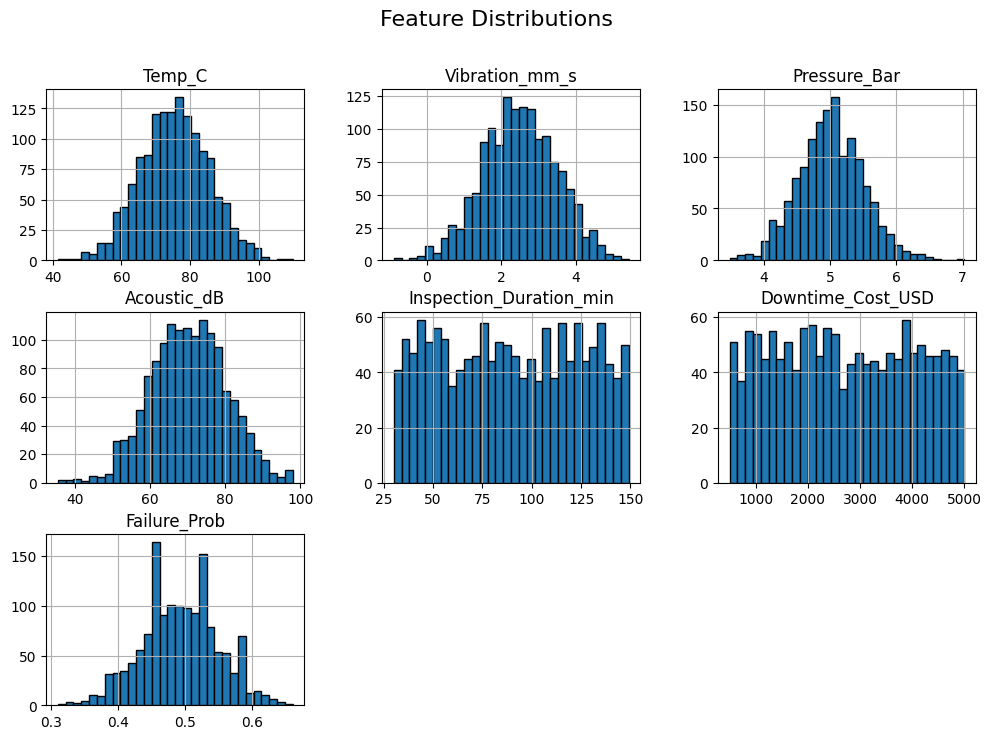

In [ ]:

num_cols = ['Temp_C', 'Vibration_mm_s', 'Pressure_Bar', 'Acoustic_dB',
             'Inspection_Duration_min', 'Downtime_Cost_USD', 'Failure_Prob']

df[num_cols].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


## Correlation Heatmap

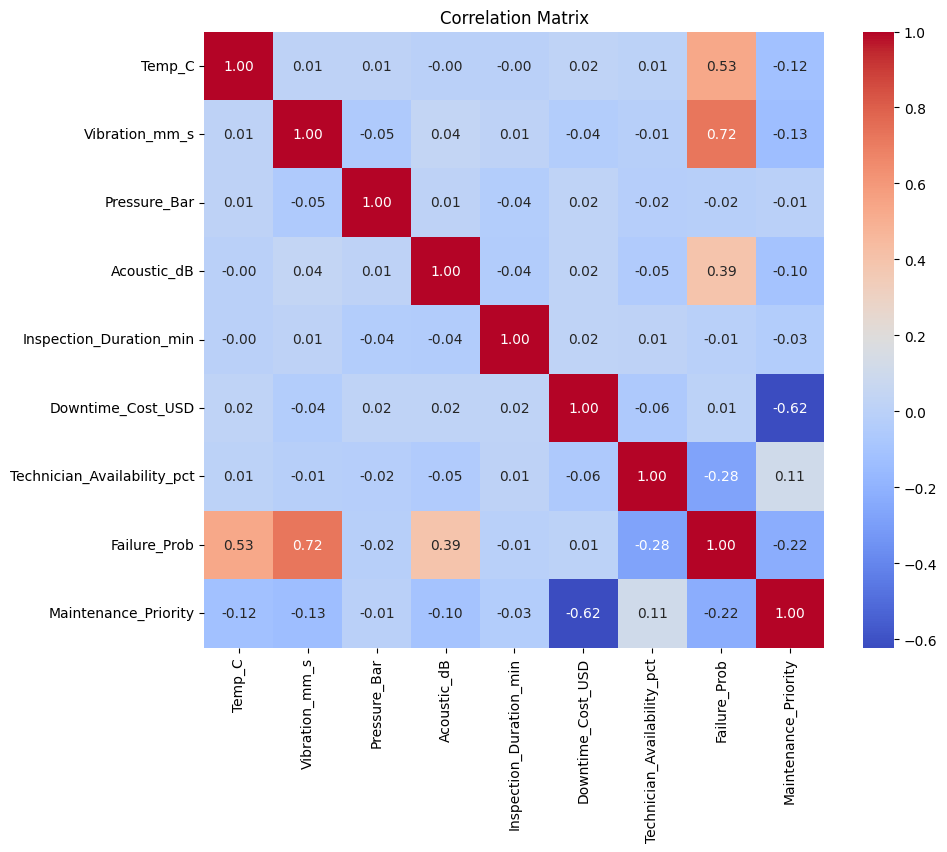

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Maintenance Priority Analysis

/tmp/ipython-input-3227061600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Maintenance_Priority', palette='viridis')


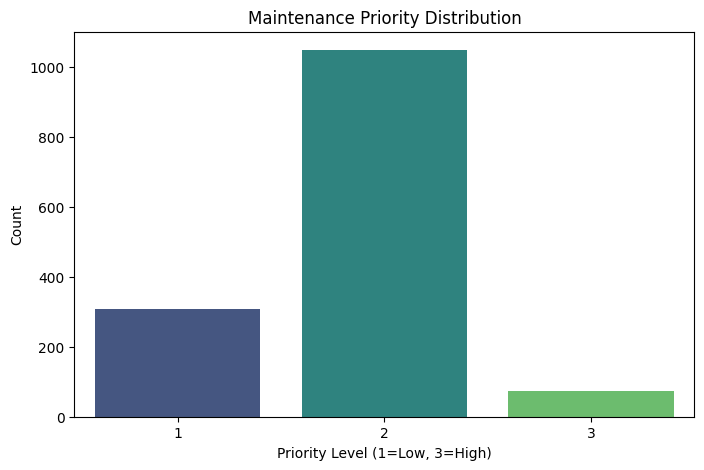

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Maintenance_Priority', palette='viridis')
plt.title('Maintenance Priority Distribution')
plt.xlabel('Priority Level (1=Low, 3=High)')
plt.ylabel('Count')
plt.show()


## Failure Probability vs Key Parameters

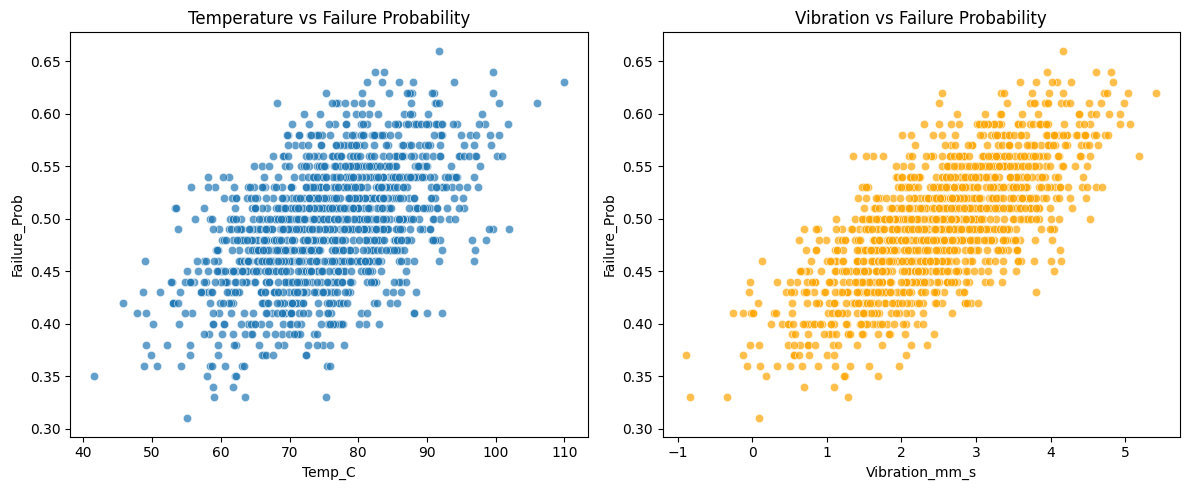

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Temp_C', y='Failure_Prob', data=df, alpha=0.7)
plt.title('Temperature vs Failure Probability')

plt.subplot(1,2,2)
sns.scatterplot(x='Vibration_mm_s', y='Failure_Prob', data=df, alpha=0.7, color='orange')
plt.title('Vibration vs Failure Probability')

plt.tight_layout()
plt.show()


## Downtime Cost vs Maintenance Priority

/tmp/ipython-input-2999726267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Maintenance_Priority', y='Downtime_Cost_USD', palette='coolwarm')


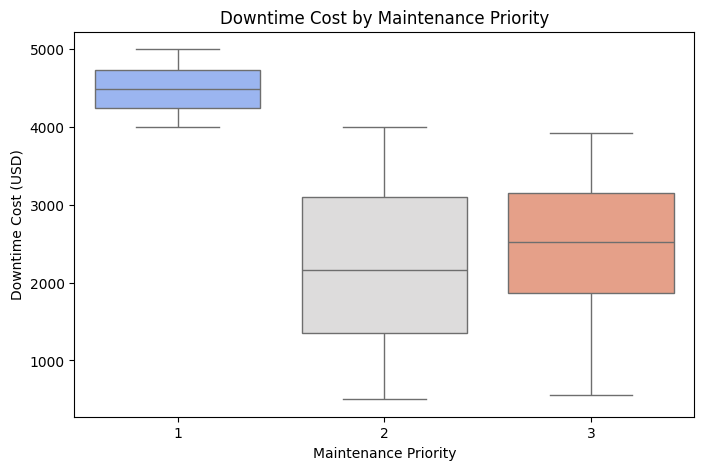

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Maintenance_Priority', y='Downtime_Cost_USD', palette='coolwarm')
plt.title('Downtime Cost by Maintenance Priority')
plt.xlabel('Maintenance Priority')
plt.ylabel('Downtime Cost (USD)')
plt.show()


## Technician Availability and Impact

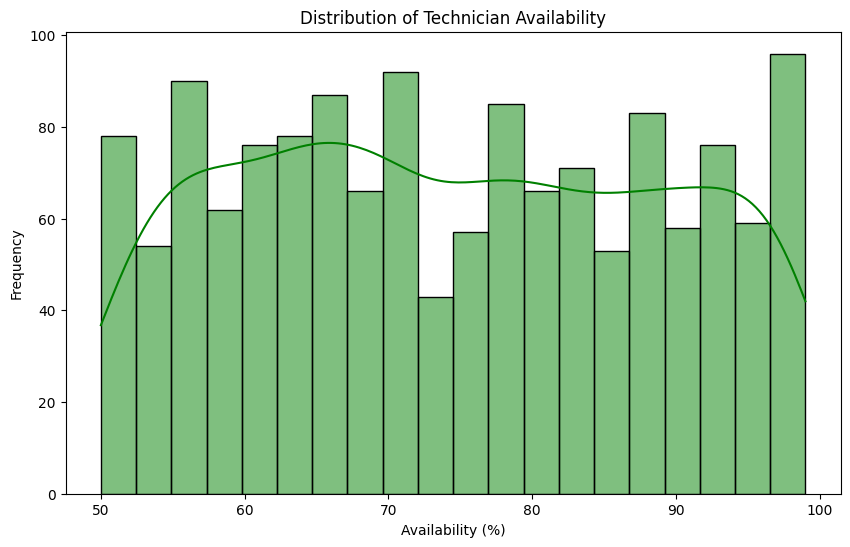

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['Technician_Availability_pct'], bins=20, kde=True, color='green')
plt.title('Distribution of Technician Availability')
plt.xlabel('Availability (%)')
plt.ylabel('Frequency')
plt.show()
